In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zip_codes = gpd.read_file('../data/zipcodes.geojson')
print(zip_codes.crs)
zip_codes.head( )

epsg:4326


zip objectid    po_name      shape_stlength        shape_starea  \
0  37115        1    MADISON  178783.02488886821  596553400.57885742   
1  37216        3  NASHVILLE  75820.997821400058  188884682.28344727   
2  37204        9  NASHVILLE  93180.292250425613  200664795.51708984   
3  37027       11  BRENTWOOD   159760.6942933173  174978422.04101562   
4  37064       18   FRANKLIN  28995.828320601937  46969608.005737305   

                                            geometry  
0  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...  
1  MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...  
2  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...  
3  MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...  
4  MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ...

In [3]:
type(zip_codes)

geopandas.geodataframe.GeoDataFrame

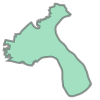

In [4]:
zip_codes.loc[0, 'geometry']

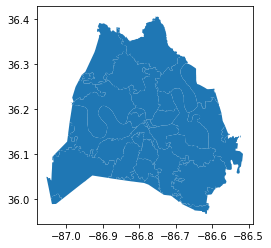

In [5]:
zip_codes.plot();

In [6]:
public_art = pd.read_csv('../data/Art_in_Public_Places.csv')
print(public_art.shape)
public_art.head(3)

(164, 10)


Title Artist Last Name Artist First Name  \
0  Les Paul Guitar Mural           Hughes            Milree   
1              Sam Davis          LeQuire              Alan   
2            The Flutist             Varo            Marton   

                          Location    Medium       Type  \
0       100 Broadway, Nashville TN  Painting      Mural   
1  4001 Harding Road, Nashville TN    Bronze  Sculpture   
2   1 Symphony Place, Nashville TN    Marble  Sculpture   

                                         Description  Latitude  Longitude  \
0                                                NaN  36.16240  -86.77491   
1                                                NaN  36.12856  -86.83660   
2  Statue commemorating Kenneth D Schermerhorn, M...  36.15961  -86.77594   

         Mapped Location  
0   (36.1624, -86.77491)  
1   (36.12856, -86.8366)  
2  (36.15961, -86.77594)

In [7]:
public_art['geometry'] = public_art.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)
public_art.head(3)

Title Artist Last Name Artist First Name  \
0  Les Paul Guitar Mural           Hughes            Milree   
1              Sam Davis          LeQuire              Alan   
2            The Flutist             Varo            Marton   

                          Location    Medium       Type  \
0       100 Broadway, Nashville TN  Painting      Mural   
1  4001 Harding Road, Nashville TN    Bronze  Sculpture   
2   1 Symphony Place, Nashville TN    Marble  Sculpture   

                                         Description  Latitude  Longitude  \
0                                                NaN  36.16240  -86.77491   
1                                                NaN  36.12856  -86.83660   
2  Statue commemorating Kenneth D Schermerhorn, M...  36.15961  -86.77594   

         Mapped Location                             geometry  
0   (36.1624, -86.77491)   POINT (-86.77491000000001 36.1624)  
1   (36.12856, -86.8366)            POINT (-86.8366 36.12856)  
2  (36.15961, -86.77594)  POINT (-86.77594000000001 36.15961)

In [8]:
public_art_geo = gpd.GeoDataFrame(public_art,
                           crs = zip_codes.crs, 
                           geometry = public_art['geometry'])

In [9]:
type(public_art_geo)

geopandas.geodataframe.GeoDataFrame

In [10]:
zip_codes = zip_codes[['geometry']]

In [11]:
nashville_art = gpd.sjoin(public_art_geo, zip_codes, op = 'within')

In [12]:
nashville_art.head(3)

Title Artist Last Name Artist First Name  \
0   Les Paul Guitar Mural           Hughes            Milree   
2             The Flutist             Varo            Marton   
11   Orpheus and Eurydice           Kaskey               Ray   

                          Location     Medium       Type  \
0       100 Broadway, Nashville TN   Painting      Mural   
2   1 Symphony Place, Nashville TN     Marble  Sculpture   
11  1 Symphony Place, Nashville TN  Limestone  Sculpture   

                                          Description  Latitude  Longitude  \
0                                                 NaN  36.16240  -86.77491   
2   Statue commemorating Kenneth D Schermerhorn, M...  36.15961  -86.77594   
11  Relief sculpture above main entrance of Scherm...  36.16017  -86.77575   

          Mapped Location                    geometry  index_right  
0    (36.1624, -86.77491)  POINT (-86.77491 36.16240)           36  
2   (36.15961, -86.77594)  POINT (-86.77594 36.15961)           36  
11  (36.16017, -86.77575)  POINT (-86.77575 36.16017)           36

In [13]:
nashville_public_art_map = folium.Map(location=[36.1624, -86.77491], zoom_start=12)
nashville_public_art_map

In [22]:
nashville_public_art_map = folium.Map(location=[36.1624, -86.77491], zoom_start=12)

for row_index, row_values in nashville_art.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Title']) + '<br><br>' + str(row_values['Type']) + '<br><br>' + str(row_values['Location'])
    icon=folium.Icon(color="purple",icon="map-marker", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(nashville_public_art_map)
    
    title_html = '''
             <h3 align="center" style="font-size:20px"><b>Nashville Art in Public Places</b></h3>
             '''
nashville_public_art_map.get_root().html.add_child(folium.Element(title_html))

nashville_public_art_map.save('../maps/nashvillepublicartmap.html')

#display our map
nashville_public_art_map

In [15]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
print(bus_stops.shape)
bus_stops.head(3)

(2524, 5)


stop              route  \
0  GREEN LN & WHITES CREEK PIKE WB      GOLDEN VALLEY   
1    _ 9TH AVE S & EDGEHILL AVE SB   8TH AVENUE SOUTH   
2   DONELSON/DELL STATION OUTBOUND  MURFREESBORO PIKE   

                  location        lat        lng  
0  (36.236249, -86.816722)  36.236249 -86.816722  
1  (36.142642, -86.780897)  36.142642 -86.780897  
2  (36.105615, -86.672004)  36.105615 -86.672004

In [16]:
type(bus_stops)

pandas.core.frame.DataFrame

In [17]:
bus_stops['geometry'] = bus_stops.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
bus_stops.head(3)

stop              route  \
0  GREEN LN & WHITES CREEK PIKE WB      GOLDEN VALLEY   
1    _ 9TH AVE S & EDGEHILL AVE SB   8TH AVENUE SOUTH   
2   DONELSON/DELL STATION OUTBOUND  MURFREESBORO PIKE   

                  location        lat        lng                      geometry  
0  (36.236249, -86.816722)  36.236249 -86.816722  POINT (-86.816722 36.236249)  
1  (36.142642, -86.780897)  36.142642 -86.780897  POINT (-86.780897 36.142642)  
2  (36.105615, -86.672004)  36.105615 -86.672004  POINT (-86.672004 36.105615)

In [18]:
type(nashville_art)

geopandas.geodataframe.GeoDataFrame

In [19]:
nashville_public_art_map = folium.Map(location=[36.1624, -86.77491], zoom_start=12)

for row_index, row_values in nashville_art.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Title']) + '<br><br>' + str(row_values['Artist First Name']) + ' ' + str(row_values['Artist Last Name']) + '<br><br>' + str(row_values['Location'])
    icon=folium.Icon(color="red",icon="map-marker", prefix='fa')

for row_index, row_values in bus_stops.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['stop']) + '<br><br>' + str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(nashville_public_art_map)
    
    title_html = '''
             <h3 align="center" style="font-size:20px"><b>Nashville Art in Public Places</b></h3>
             '''
nashville_public_art_map.get_root().html.add_child(folium.Element(title_html))

nashville_public_art_map.save('../maps/nashvillepublicartmap.html')

#display our map
nashville_public_art_map